# EDA / Exploratory Data Analysis (1)

In [1]:
# importing modules
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [2]:
price = pd.read_csv('price.csv')

In [3]:
# cek type data apakah telah dataframe atau belum
print(type(price))
# ukuran data
N, P = price.shape
'baris :', N, 'kolom :', P

<class 'pandas.core.frame.DataFrame'>


('baris :', 936, 'kolom :', 10)

In [4]:
price.head()
# noted apabila terdapat data yang seragam pada kolom observation maka dia tidak bermanfaat untuk analisa lebih lanjut.

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [5]:
price.tail(10)
# pada baris-baris terakhir telah terungkap bahwa data pada kolom observation memiliki data yang seragam yang mengharuskan kita
#untuk meremove dari dataset kita

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
926,927,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
927,928,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,929,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,930,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,931,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
935,936,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


In [6]:
# mengambil sampel secara random
price.sample(10)

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
61,62,10566.0,10728.0,16951.0,1470.0,1763.0,Covered,CAT B,1080,8366000
477,478,8799.0,10559.0,14496.0,1455.0,1757.0,No Parking,CAT A,650,6752000
452,453,6885.0,7314.0,10673.0,1311.0,1571.0,No Parking,CAT B,470,7209000
591,592,6237.0,10793.0,12774.0,1212.0,1440.0,Open,CAT B,500,6395000
25,26,7103.0,9832.0,10943.0,1234.0,1488.0,No Parking,CAT B,840,4188000
699,700,5874.0,10389.0,8292.0,1485.0,1785.0,Not Provided,CAT A,1340,6616000
468,469,10272.0,8355.0,13586.0,1768.0,2123.0,Not Provided,CAT B,860,4959000
134,135,6139.0,9882.0,10482.0,1718.0,2051.0,Open,CAT B,750,4921000
496,497,12787.0,12142.0,15454.0,1430.0,1690.0,Open,CAT A,800,7895000
914,915,9652.0,9102.0,12608.0,1792.0,2131.0,No Parking,CAT A,810,7642000


In [7]:
# untuk mengecek ada variabel apa saja di kolom
price.columns

Index(['Observation', 'Dist_Taxi', 'Dist_Market', 'Dist_Hospital', 'Carpet',
       'Builtup', 'Parking', 'City_Category', 'Rainfall', 'House_Price'],
      dtype='object')

In [8]:
# menghapus kolom/variabel yang tidak dibutuhkan dalam preprocessing yaitu observations
price.drop('Observation', axis=1, inplace=True)

In [9]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dist_Taxi      923 non-null    float64
 1   Dist_Market    923 non-null    float64
 2   Dist_Hospital  935 non-null    float64
 3   Carpet         928 non-null    float64
 4   Builtup        921 non-null    float64
 5   Parking        936 non-null    object 
 6   City_Category  936 non-null    object 
 7   Rainfall       936 non-null    int64  
 8   House_Price    936 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 65.9+ KB


In [10]:
# ada kesalahan type data pada parking dan city_category yang seharusnya adalah category
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price.dtypes

Dist_Taxi         float64
Dist_Market       float64
Dist_Hospital     float64
Carpet            float64
Builtup           float64
Parking          category
City_Category    category
Rainfall            int64
House_Price         int64
dtype: object

In [11]:
# mengecek apakah ada duplikat data?
print(price.shape)
price.duplicated().sum()
# di dataset ini terdapat 4 buah data yang duplikat

(936, 9)


4

In [12]:
# menghapus entri yang memiliki data yang duplikat
# inplace untuk efiensi penyimpanan memory
price.drop_duplicates(inplace=True)
# recheck lagi
print(price.shape)
price.duplicated().sum()

(932, 9)


0

# selection variabel 

In [13]:
# memilih hanya variabel dengan type data tertentu
price_num = price.select_dtypes(include= ['float64', 'int64'])
price_num.head()
# price_num adalah variabel df baru

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000


In [14]:
price_cat = price.select_dtypes(include= ['category'])
price_cat.head()

,Parking,City_Category
0,Open,CAT B
1,Not Provided,CAT B
2,Not Provided,CAT A
3,Covered,CAT B
4,Not Provided,CAT B


In [15]:
#pengolahan variabel kategorik: dummy variabel
df = pd.get_dummies(price['Parking'], prefix='Park')
df.head()

,Park_Covered,Park_No Parking,Park_Not Provided,Park_Open
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


In [16]:
#menggabungkan dengan data awal(concat)
#transpose berguna untuk memudahkan dalam melihat variabel pada data frame yang memiliki variabel/kolom yang banyak
df2 = pd.concat([price, df],axis=1)
df2.head().transpose()

,0,1,2,3,4
Dist_Taxi,9796.0,8294.0,11001.0,8301.0,10510.0
Dist_Market,5250.0,8186.0,14399.0,11188.0,12629.0
Dist_Hospital,10703.0,12694.0,16991.0,12289.0,13921.0
Carpet,1659.0,1461.0,1340.0,1451.0,1770.0
Builtup,1961.0,1752.0,1609.0,1748.0,2111.0
Parking,Open,Not Provided,Not Provided,Covered,Not Provided
City_Category,CAT B,CAT B,CAT A,CAT B,CAT B
Rainfall,530,210,720,620,450
House_Price,6649000,3982000,5401000,5373000,4662000
Park_Covered,0,0,0,1,0


In [17]:
# memilih satu variabel/kolom secara manual
x = price[['House_Price', 'Dist_Market']]
x[:7]

,House_Price,Dist_Market
0,6649000,5250.0
1,3982000,8186.0
2,5401000,14399.0
3,5373000,11188.0
4,4662000,12629.0
5,4526000,5142.0
6,7224000,11869.0


# apakah ada kecenderungan perbedaan harga rumah akibat dari tipe tempat parkir ?

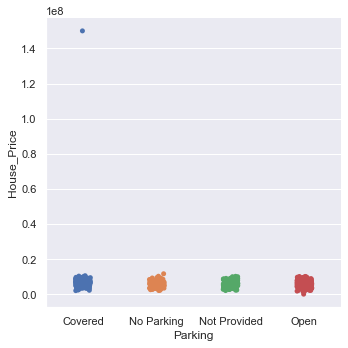

In [18]:
# catplot = category plot
p = sns.catplot(x='Parking', y='House_Price', data=price)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


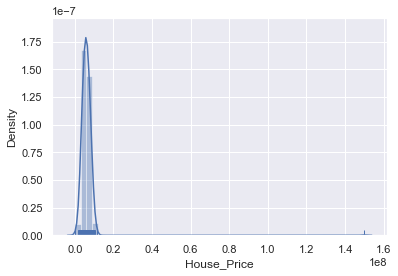

In [28]:
#cara kedua dalam melihat outlier
# distribution plot
p = sns.distplot(price['House_Price'], kde=True, rug=True)

In [33]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel 'harga'

df = np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(932,)


0    True
1    True
2    True
3    True
4    True
Name: House_Price, dtype: bool

In [34]:
price2 = price[df] #data tanpa outlier
print(price2.shape, price.shape)
# perhatikan disini sengaja data yang telah di remove outliernya
# di simpan ke dalam variabel baru "price2" agar kita dapat melakukan perbandingan antara data dengan outlier sama yang tidak
# jika datanya besar hati-hati melakukan hal ini

(931, 9) (932, 9)


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


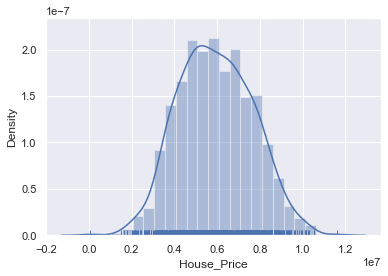

In [35]:
# distribution visualisasi
p = sns.distplot(price2['House_Price'], kde=True, rug=True)
# tanpa outlier ploting telah seperti distribusi normal

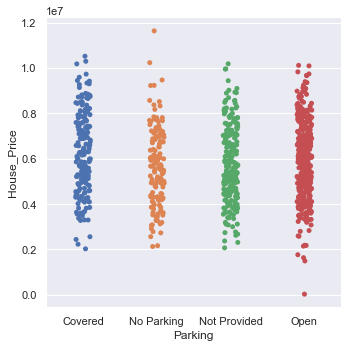

In [40]:
p = sns.catplot(x="Parking", y="House_Price", data=price2)
# karena keterbatasan dimensi maka interpretasinya adalah tempat parkir tidak mempengaruhi dengan harga rumah 
# interpretasi yang tepat adalah jika diasumsikan variabe lain yang ada di dataset kita anggap sama maka tempat parkir tidak
# mempengaruhi dengan harga rumah

In [42]:
# cara melihat dan mengetahui missing value secara general
print(price2.isnull().sum())

Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64


In [44]:
set(price2['Parking'])

{'Covered', 'No Parking', 'Not Provided', 'Open'}

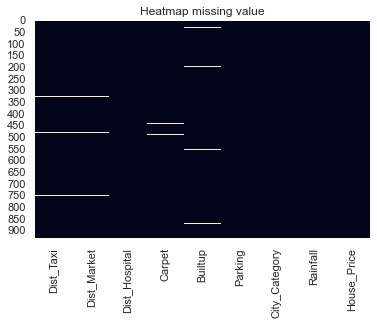

In [47]:
# missing value pada dataset ini tidak cukup menyebar jadi kita dapat meng exclude data missing valuenya
# beda apabila missing value nya menyebar apabila kita tetap meng exclude nya maka data yg dihasilkan akan hilang secara drastis
sns.heatmap(price.isnull(), cbar=False)
plt.title('Heatmap missing value')
plt.show()

In [52]:
(price2.isnull().sum()/len(price2)).to_frame('Persentase missing')

,Persentase missing
Dist_Taxi,0.013963
Dist_Market,0.013963
Dist_Hospital,0.001074
Carpet,0.008593
Builtup,0.016112
Parking,0.000000
City_Category,0.000000
Rainfall,0.000000
House_Price,0.000000


In [54]:
# simplest solution, if the missing values is not a lot
# drop rows with missing values: ada berbagai cara
# X = price.dropna() #jika ada MV minimal disalah satu kolom, maka baris dihapus
# price2.dropna(how='all') #jika ada MV disemua kolom, maka baris dihapus
# price2.dropna(thresh=2) #jika ada MV minimal di salah 2 kolom, maka baris dihapus
# price2.dropna(subset=['Dist_Hospital'])[:7] #jika ada MV minimal satu disalah kolom Dist_Hospital
#inplace=True selalu dilakukan apabila bisa agar mengehemat penyimpanan memory
price2.dropna(inplace=True)

In [55]:
# noted melakukan treatmen terhadap MV apabila kita ingin menggunakan model yang tidak support terhadap MV. seperti regressi
# kalo desicion tree kita dapat menggunakan MV
# kesimpulan preprocessing berbeda-beda tergantung dengan model yang ingin digunakan nantinya
print(price2.isnull().sum())

Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
dtype: int64


In [56]:
# melakukan perhitungan statistik deskrptif pada data numerik
price2.describe()

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Rainfall,House_Price
count,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,8.970000e+02
mean,8234.092531,11014.810479,13086.516165,1485.586399,1782.282051,785.340022,5.932165e+06
std,2526.851636,2528.087365,2567.090681,250.153381,299.795462,266.956895,1.720409e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,-110.000000,1.492000e+06
25%,6486.000000,9367.000000,11302.000000,1317.000000,1576.000000,600.000000,4.638000e+06
50%,8230.000000,11161.000000,13192.000000,1477.000000,1774.000000,780.000000,5.860000e+06
75%,9963.000000,12675.000000,14860.000000,1653.000000,1985.000000,970.000000,7.183000e+06
max,16850.000000,18281.000000,22407.000000,2229.000000,2667.000000,1560.000000,1.163200e+07


In [58]:
#untuk melihat seluruh jenis data kategori maupun numerik
price2.describe(include='all')
# unique merupakan seberapa banyak jenis data pada variabel tersebut
# top adalah jenis data yang sering muncul di variabel tersebut
# freq / frequency adalah jumlah frekuensi kemunculan/modus dari top pada data tersebut
# noted : pada jenis data kategori kita hanyak dapat menghitung mode/modus saja

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
count,897.000000,897.000000,897.000000,897.000000,897.000000,897,897,897.000000,8.970000e+02
unique,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Open,CAT B,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,353,347,NaN,NaN
mean,8234.092531,11014.810479,13086.516165,1485.586399,1782.282051,NaN,NaN,785.340022,5.932165e+06
std,2526.851636,2528.087365,2567.090681,250.153381,299.795462,NaN,NaN,266.956895,1.720409e+06
min,146.000000,1666.000000,3227.000000,775.000000,932.000000,NaN,NaN,-110.000000,1.492000e+06
25%,6486.000000,9367.000000,11302.000000,1317.000000,1576.000000,NaN,NaN,600.000000,4.638000e+06
50%,8230.000000,11161.000000,13192.000000,1477.000000,1774.000000,NaN,NaN,780.000000,5.860000e+06
75%,9963.000000,12675.000000,14860.000000,1653.000000,1985.000000,NaN,NaN,970.000000,7.183000e+06


In [63]:
# distribusi tiap data
# biasa digunakan pada kategori saja
price['Parking'].value_counts()

Open            372
Not Provided    227
Covered         188
No Parking      145
Name: Parking, dtype: int64

In [67]:
# untuk melihat data dengan dua variabel atau tabel
# CT = contingency tables
CT = pd.crosstab(index=price2['City_Category'], columns=price2['Parking'])
CT

Parking,Covered,No Parking,Not Provided,Open
City_Category,,,,
CAT A,72,50,80,115
CAT B,59,51,88,149
CAT C,49,40,55,89


In [68]:
# saving (preprocessed) data
# encoding berguna untuk huruf apa yang akan digunakan didalam file tersebut. disini utf8 cocok untuk alphabet seperti indonesia
# inggris, uk, malaysia, dsb
# untuk bahasa jepang, korea, arab tidak dianjurkan menggunakan utf8
price2.to_csv("price_PreProcessed.csv", encoding='utf8')